In [1]:
# 코드 실행 상태가 초기화되었기 때문에 파일을 다시 불러와야 합니다.
import pandas as pd
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# 파일 경로 재지정
file_path = "C:/sql_data/Cohort_Users.csv"
df = pd.read_csv(file_path)

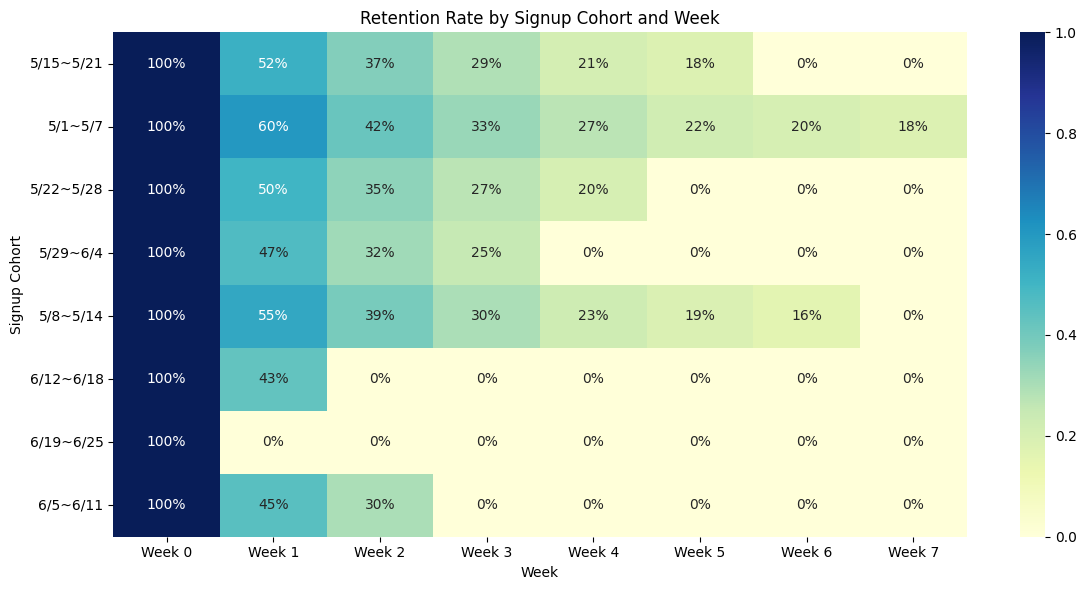

In [ ]:
# 리텐션을 위한 피벗 테이블 생성
pivot_retention = (
    df.groupby(["signup_cohort", "week"])["user_id"]
    .nunique()
    .reset_index()
    .pivot(index="signup_cohort", columns="week", values="user_id")
    .fillna(0)
)

# Week 0 기준으로 나누어 비율 계산
pivot_retention_rate = pivot_retention.divide(pivot_retention["Week 0"], axis=0).round(3)


# plt.figure(figsize=(12, 6))
# sns.heatmap(pivot_retention_rate, annot=True, fmt=".0%", cmap="YlGnBu")
# plt.title("Retention Rate by Signup Cohort and Week")
# plt.xlabel("Week")
# plt.ylabel("Signup Cohort")
# plt.tight_layout()
# plt.show()

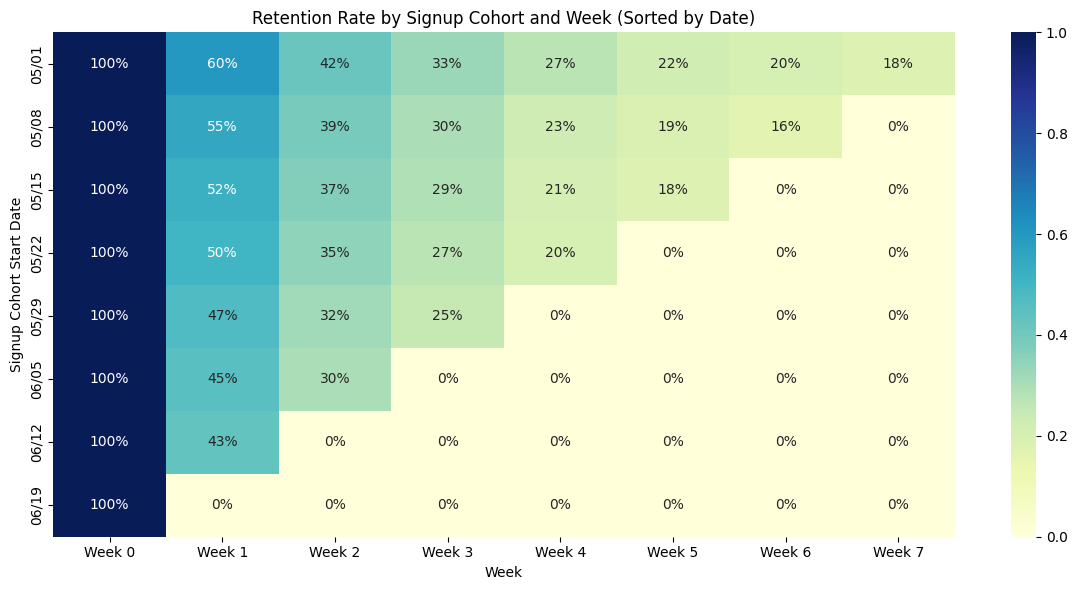

In [5]:
# 오류 수정: signup_cohort 문자열에서 "~" 기준으로 나누어 시작일 추출

def extract_start_date(cohort_str):
    # 예: "5/1~5/7" → "5/1"
    start_str = cohort_str.split('~')[0]
    month, day = start_str.split('/')
    return pd.to_datetime(f"2023-{int(month):02d}-{int(day):02d}")

# 시작일 컬럼 추가
df["signup_cohort_start"] = df["signup_cohort"].apply(extract_start_date)

# 다시 피벗 생성 + 정렬
pivot_retention = (
    df.groupby(["signup_cohort", "signup_cohort_start", "week"])["user_id"]
    .nunique()
    .reset_index()
    .pivot(index="signup_cohort_start", columns="week", values="user_id")
    .fillna(0)
)

# 비율 계산
pivot_retention_rate = pivot_retention.divide(pivot_retention["Week 0"], axis=0).round(3)

# 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_retention_rate, annot=True, fmt=".0%", cmap="YlGnBu",
            yticklabels=[d.strftime('%m/%d') for d in pivot_retention_rate.index])
plt.title("Retention Rate by Signup Cohort and Week (Sorted by Date)")
plt.xlabel("Week")
plt.ylabel("Signup Cohort Start Date")
plt.tight_layout()
plt.show()